Install packages

In [1]:
!pip install mujoco

# Configure MuJoCo to use the EGL rendering backend (requires GPU)
print('Setting environment variable to use GPU rendering:')
%env MUJOCO_GL=egl

# Check if installation was succesful.
try:
  print('Checking that the installation succeeded:')
  import mujoco
  mujoco.MjModel.from_xml_string('<mujoco/>')
except Exception as e:
  raise e from RuntimeError(
      'Something went wrong during installation. Check the shell output above '
      'for more information.\n'
      'If using a hosted Colab runtime, make sure you enable GPU acceleration '
      'by going to the Runtime menu and selecting "Choose runtime type".')

print('Installation successful.')

# Graphics and plotting.
print('Installing mediapy:')
!command -v ffmpeg >/dev/null || (apt update && apt install -y ffmpeg)
!pip install -q mediapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 963.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 11.6 MB/s eta 0:00:00
Setting environment variable to use GPU rendering:
env: MUJOCO_GL=egl
Checking that the installation succeeded:
Installation successful.
Installing mediapy:
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.6 MB/s eta 0:00:00


Change directory to cwd

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My\ Drive/Colab\ Notebooks/Colab-Exp8/
# Import robot class

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/Colab-Exp8


Import packages

In [3]:
from kine import myRobot
import numpy as np
import matplotlib.pyplot as plt

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
Joint Angles for FK (in rad) : [ 1.  0. -1.  0.  0.  0.]
Joint Angles for FK (in degree) : [ 57.29577951   0.         -57.29577951   0.           0.
   0.        ]


Position Coord. of End effector (in mm) from FK: [-252.40018368 -406.0457058   937.21114299]


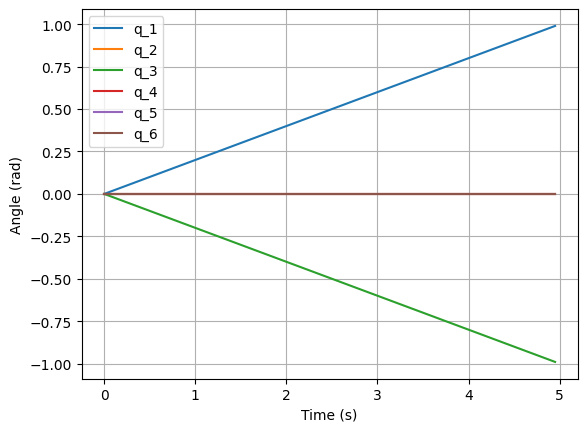

In [4]:
# Simulation time
simTime=5

# Path to xml file of PUMA 560 manipulator
#xmlpath="PUMA 560/puma_scene.xml"
xmlpath="Svaya SR-L6/svaya_scene.xml"

my6R=myRobot(xmlpath)
##### Task-2: Forward Kinematics

# Initial joint angles (in rad)
qi=[0,0,0,0,0,0]

# Final joint angles (in rad)
#qf=qi

# Move the joints
qf=[1,0,-1,0,0,0]
cycTime=simTime
#cfreq=0.1 # Frequency of joint traj
# Function for joint trjectory
def qtraj(t):
    th=np.zeros(8)
    a = np.empty([6, 4]) # Coefficients for cubic polynomial trajectory
    for i in np.arange(0,len(qi)):
        th[i]=qi[i]+(qf[i]-qi[i])*( (t % cycTime)/cycTime) #linear trajectory
        # Task - Write Cubic Polynomial trajectory for all joints to move from qi to qf with Zero initial and final velocity
        #a[i,:]=np.linalg.inv(np.array([[1,0,0,0],[1,cycTime,cycTime**2,cycTime**3],[0,1,0,0],[0,1,2*cycTime,3*cycTime**2]])) @ np.array([qi[i],qf[i],0,0])
        #th[i]=a[i,0] + a[i,1]*t + a[i,2] * t**2 + a[i,3] * t**3
    return np.array(th)

# Run forward kinematics -- Close the window to stop
o_ee=my6R.fkin(qtraj,simTime,3,30,-30)
# Position of End-effector
print('Position Coord. of End effector (in mm) from FK:', 1000*o_ee)

# Trajectory plots
# Plot the joint angles (on Y-axis) with Time (on X-axis) using function qtraj
ttraj=np.arange(0,simTime,simTime/100)
qvec=[]
plt.figure
for t in ttraj:
    qvec.append(qtraj(t))
qvec=np.array(qvec)
for i in range(6):
    plt.plot(ttraj,qvec[:,i],label=f'q_{i+1}')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.legend()
plt.grid()
plt.show()